In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [2]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

<h1>CNN WITH ONE SET OF CONVOLUTIONAL AND POOLING LAYER</h1>

In [4]:
from keras.datasets import mnist

(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.reshape(xTrain.shape[0], 28, 28, 1).astype('float32')
xTest = xTest.reshape(xTest.shape[0], 28, 28, 1).astype('float32')

In [5]:
xTrain = xTrain / 255
xTest = xTest / 255

In [6]:
yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)
num_classes = yTest.shape[1]

In [9]:
def convolutional_model():
    model = Sequential()
    model.add(Input(shape = (28, 28, 1)))
    model.add(Conv2D(16, (5, 5), strides = (1, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [10]:
model = convolutional_model()
model.fit(xTrain, yTrain, validation_data = (xTest, yTest), epochs = 10, batch_size = 200, verbose = 2)
scores = model.evaluate(xTest, yTest, verbose = 0)
print("Accuracy: ", scores[1], "Error: ", (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - 13ms/step - accuracy: 0.9168 - loss: 0.2956 - val_accuracy: 0.9741 - val_loss: 0.0894
Epoch 2/10
300/300 - 2s - 8ms/step - accuracy: 0.9761 - loss: 0.0832 - val_accuracy: 0.9824 - val_loss: 0.0584
Epoch 3/10
300/300 - 2s - 8ms/step - accuracy: 0.9827 - loss: 0.0584 - val_accuracy: 0.9825 - val_loss: 0.0511
Epoch 4/10
300/300 - 2s - 8ms/step - accuracy: 0.9865 - loss: 0.0449 - val_accuracy: 0.9872 - val_loss: 0.0407
Epoch 5/10
300/300 - 2s - 8ms/step - accuracy: 0.9884 - loss: 0.0374 - val_accuracy: 0.9862 - val_loss: 0.0420
Epoch 6/10
300/300 - 2s - 8ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9878 - val_loss: 0.0381
Epoch 7/10
300/300 - 2s - 8ms/step - accuracy: 0.9920 - loss: 0.0268 - val_accuracy: 0.9885 - val_loss: 0.0370
Epoch 8/10
300/300 - 2s - 8ms/step - accuracy: 0.9933 - loss: 0.0220 - val_accuracy: 0.9884 - val_loss: 0.0365
Epoch 9/10
300/300 - 2s - 8ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9883 - val_loss: 0.0371


<h1>CNN WITH TWO SETS OF CONVOLUTIONAL AND POOLING LAYERS</h1>

In [11]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [12]:
print(xTrain.shape, "    ", xTest.shape)

(60000, 28, 28, 1)      (10000, 28, 28, 1)


In [15]:
# build the model
model2 = convolutional_model()

# fit the model
model2.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model2.evaluate(xTest, yTest, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 - 3s - 11ms/step - accuracy: 0.8737 - loss: 0.4648 - val_accuracy: 0.9572 - val_loss: 0.1462
Epoch 2/10
300/300 - 2s - 6ms/step - accuracy: 0.9619 - loss: 0.1293 - val_accuracy: 0.9728 - val_loss: 0.0867
Epoch 3/10
300/300 - 2s - 6ms/step - accuracy: 0.9724 - loss: 0.0915 - val_accuracy: 0.9785 - val_loss: 0.0687
Epoch 4/10
300/300 - 2s - 6ms/step - accuracy: 0.9776 - loss: 0.0739 - val_accuracy: 0.9804 - val_loss: 0.0616
Epoch 5/10
300/300 - 2s - 6ms/step - accuracy: 0.9811 - loss: 0.0617 - val_accuracy: 0.9828 - val_loss: 0.0503
Epoch 6/10
300/300 - 2s - 6ms/step - accuracy: 0.9833 - loss: 0.0542 - val_accuracy: 0.9851 - val_loss: 0.0457
Epoch 7/10
300/300 - 2s - 7ms/step - accuracy: 0.9851 - loss: 0.0480 - val_accuracy: 0.9867 - val_loss: 0.0422
Epoch 8/10
300/300 - 2s - 6ms/step - accuracy: 0.9866 - loss: 0.0439 - val_accuracy: 0.9872 - val_loss: 0.0400
Epoch 9/10
300/300 - 2s - 7ms/step - accuracy: 0.9877 - loss: 0.0400 - val_accuracy: 0.9885 - val_loss: 0.0358


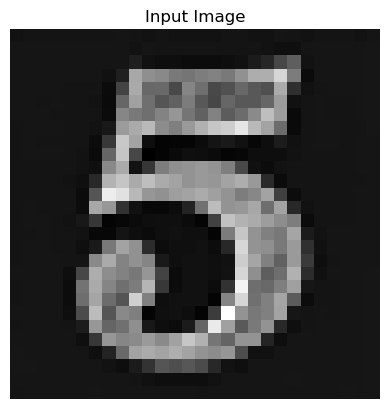

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Class: 5


In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
def preprocess_image(image_path):
    # Load the image in grayscale mode
    image = Image.open(image_path).convert("L")
    
    # Resize the image to 28x28 pixels
    image = image.resize((28, 28))
    
    # Normalize pixel values (0-255 to 0-1)
    image = np.array(image).astype('float32') / 255.0
    
    # Add batch and channel dimensions to match input shape
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = np.expand_dims(image, axis=-1)  # Add channel dimension (for grayscale)
    
    return image

# Path to your image
image_path = "image.png"

# Preprocess the image
processed_image = preprocess_image(image_path)

# Show the image
plt.imshow(processed_image.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

# Use the model to predict the class
predicted_class = model2.predict(processed_image)
predicted_label = np.argmax(predicted_class)

print(f"Predicted Class: {predicted_label}")


In [ ]:
model2.save()